<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/main/TALLER/PRACTICA_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RECONOCIENDO OBJETOS**

In [2]:
pip install opencv-python

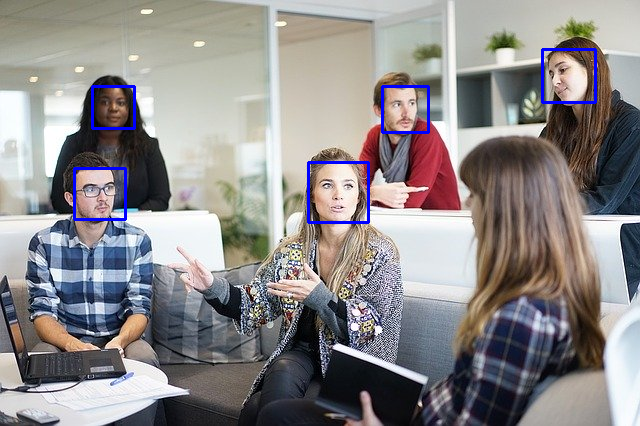

In [10]:
import cv2
from google.colab.patches import cv2_imshow
#Cargar imagen
img=cv2.imread('imagen_000.jpg')
# Check if the image is loaded correctly
if img is None:
    print("Error: Could not load image.")
else:
    #Cargar clasificados para colab
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
     # Revisar si cargo el clasificador
    if face_cascade.empty():
        print("Error: no encontro 'haarcascade_frontalface_default.xml' al cargar.")
    else:
        #Convertir imagen la imagen a escala de grises
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        #Detectar rostros
        rostros=face_cascade.detectMultiScale(gray,1.1,4)
        #Dibujar rectangulos alrededor de los rostros
        for (x,y,w,h) in rostros:
          cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        #Mostrar imagen
        cv2_imshow(img)
        #cv2.waitKey(0) # waitKey is not supported in Colab

Iniciando a webcam. Por favor, conceda as permissões do navegador.


<IPython.core.display.Javascript object>

Reconhecimento facial em tempo real (quase) iniciado. Para parar, interrompa a execução desta célula.


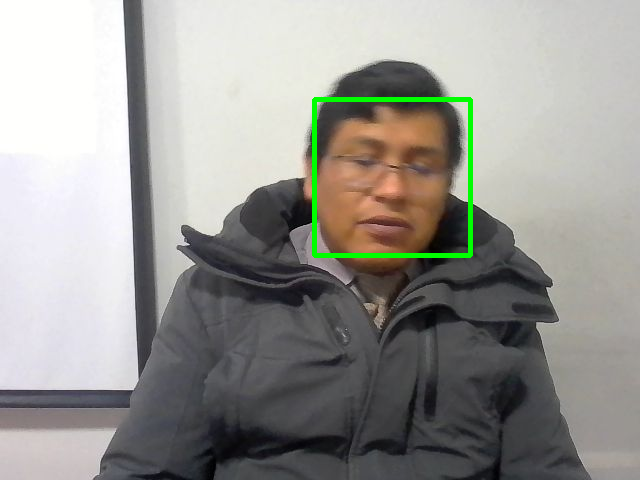

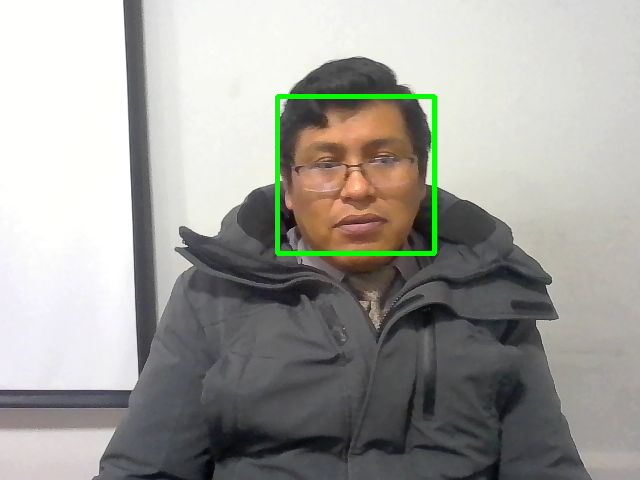

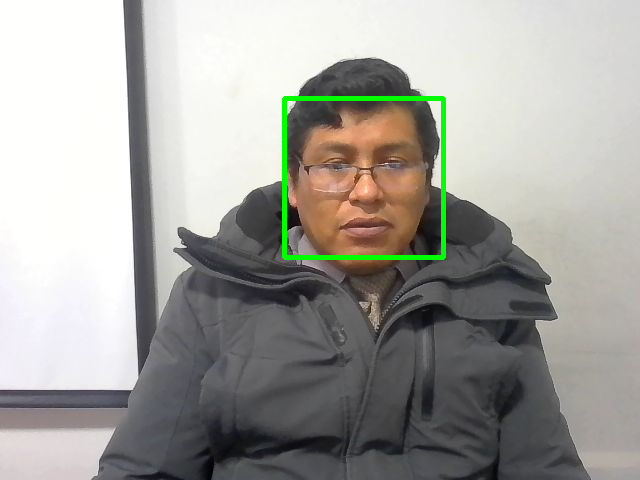

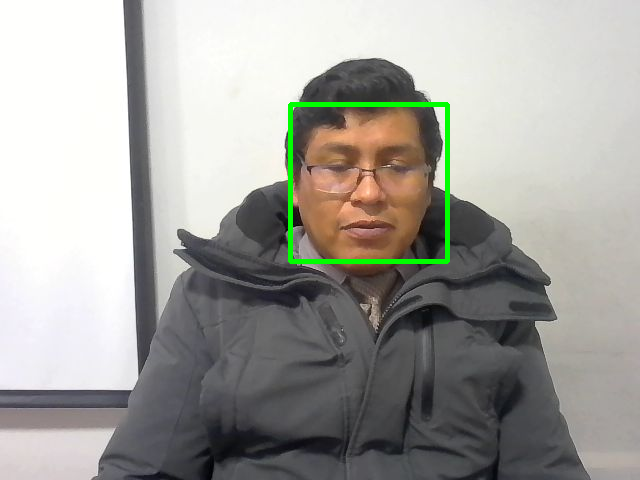

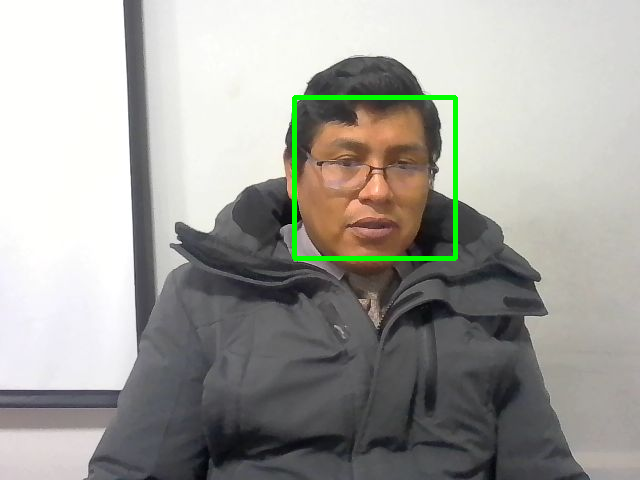

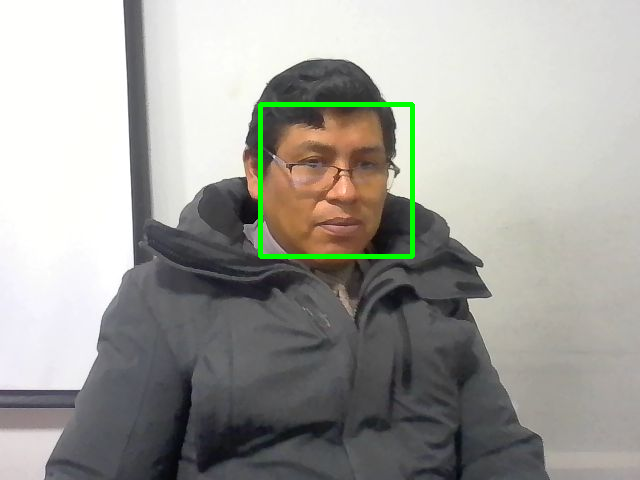

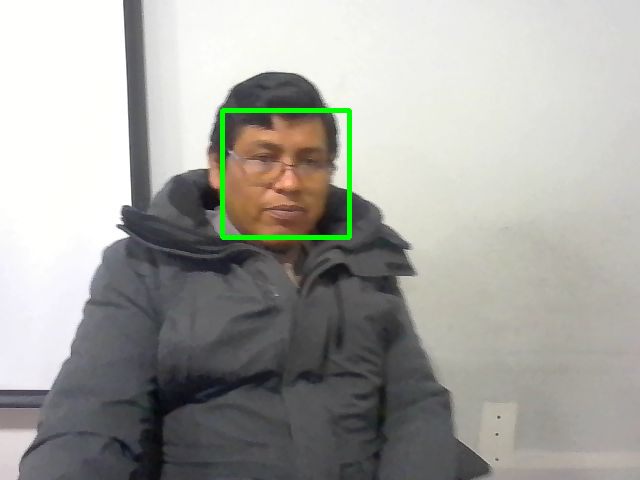

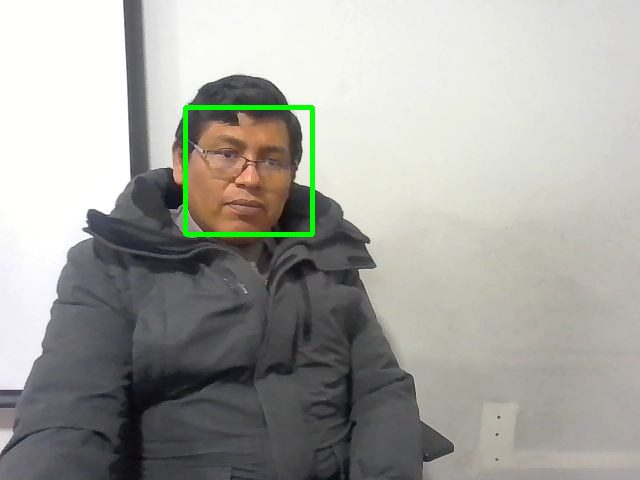

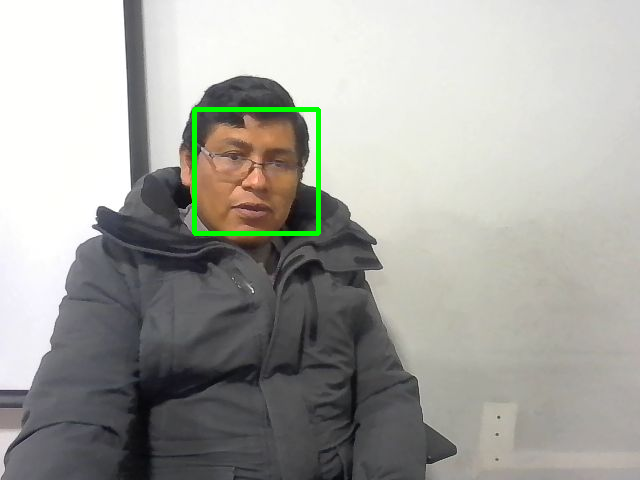

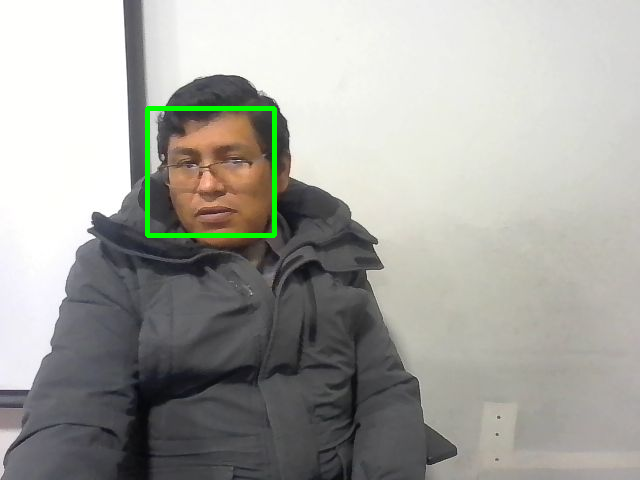

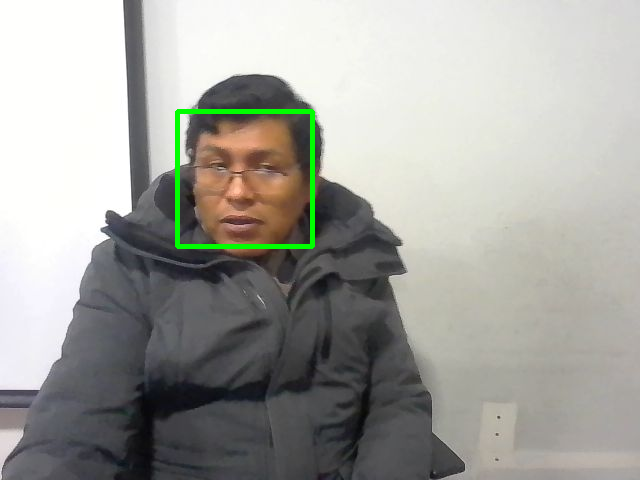

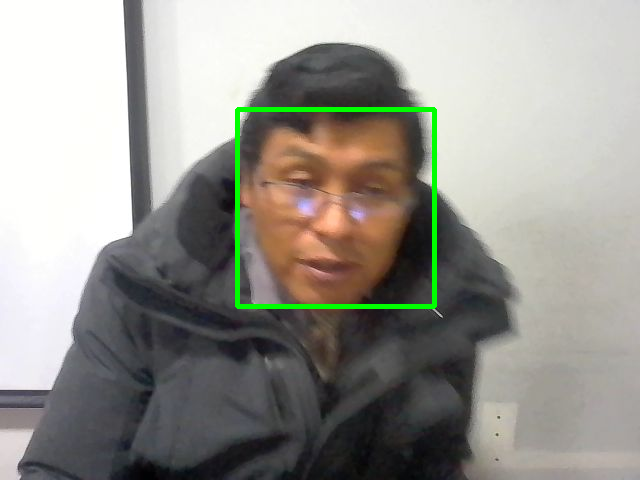

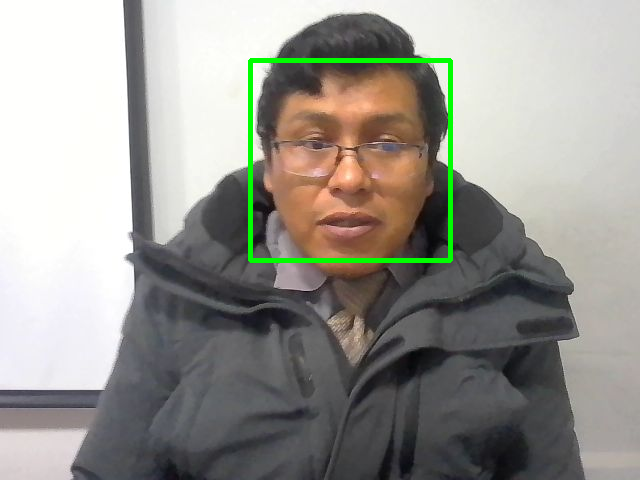

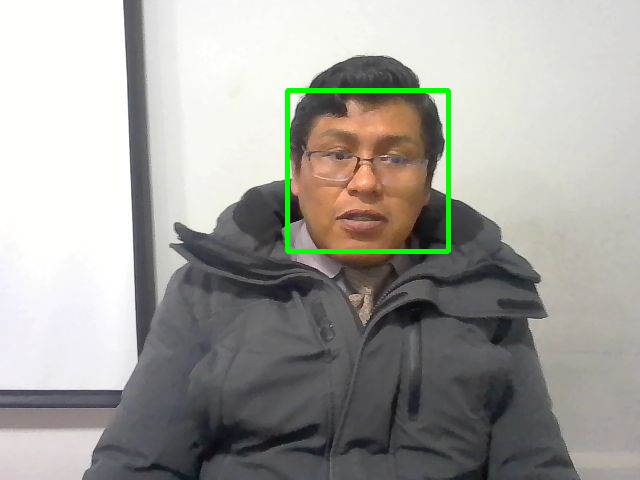

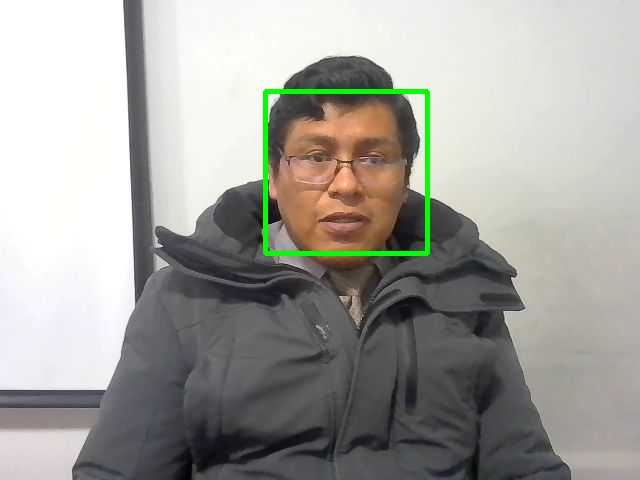

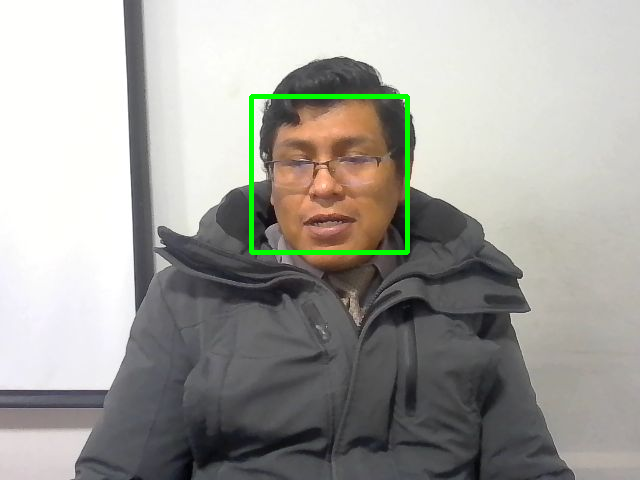

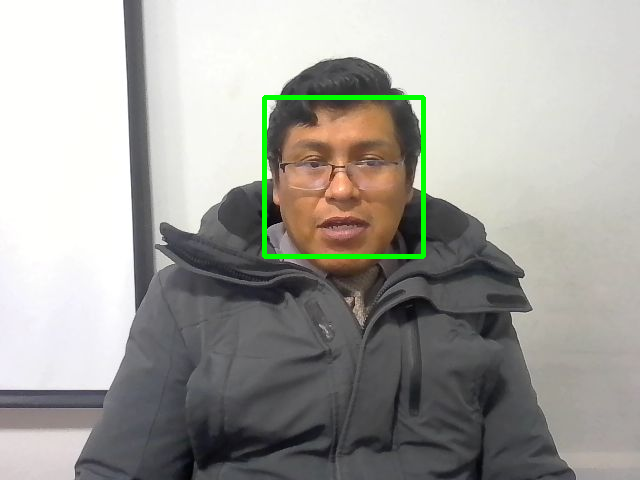

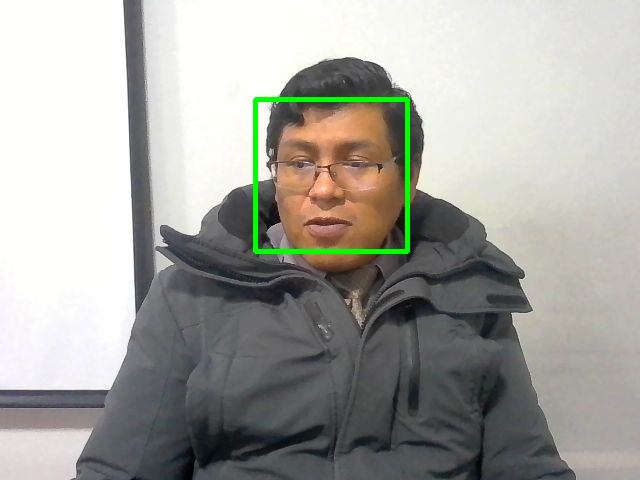

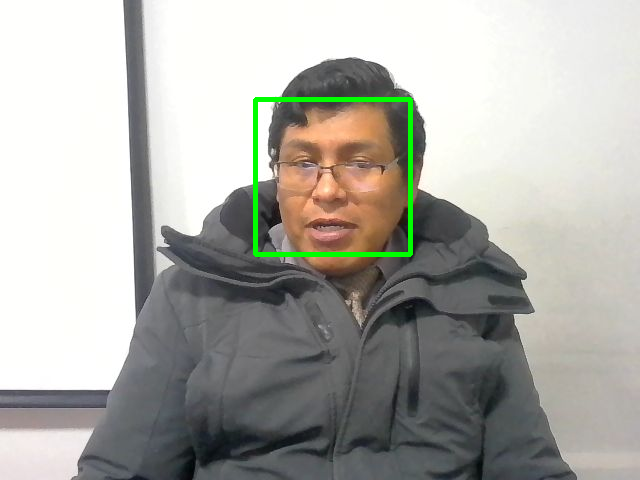

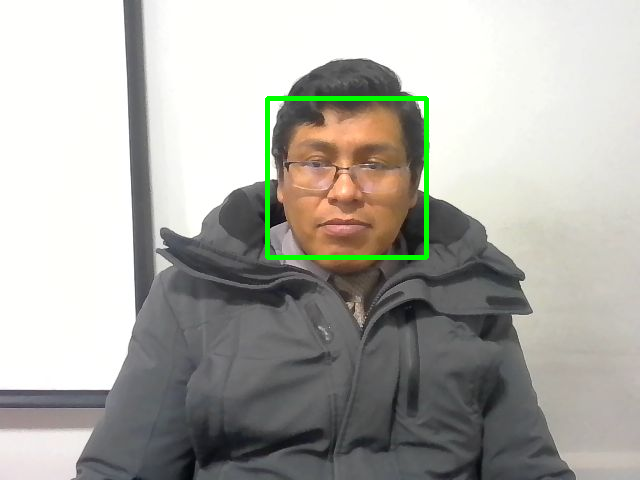

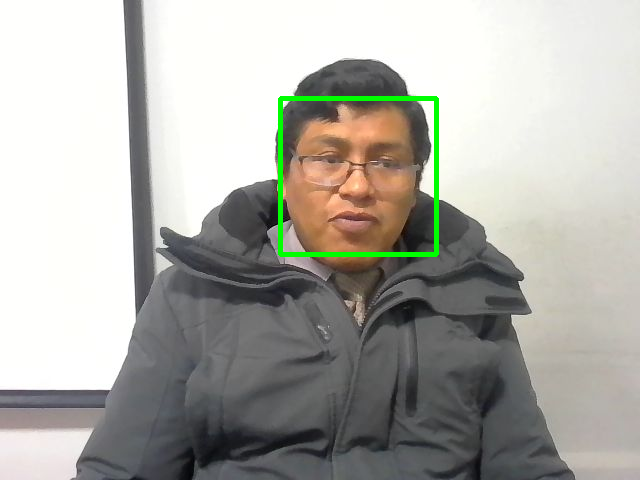

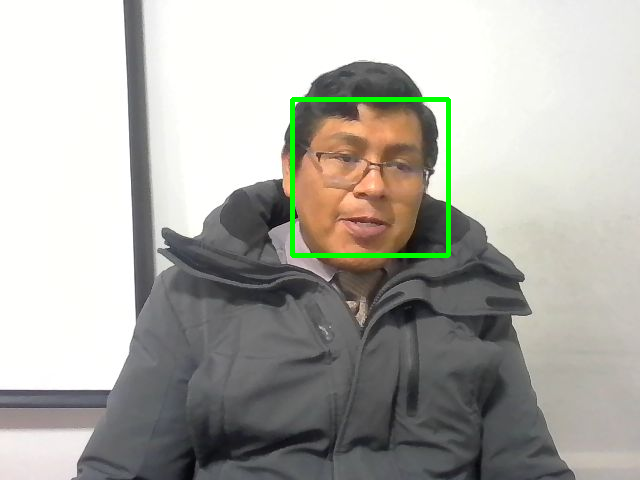

Webcam desligada.


KeyboardInterrupt: 

In [23]:
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import time

def start_webcam_stream():
  js = Javascript('''
    var video;
    var canvas;
    var stream;

    // Inicializa a webcam quando a função é chamada pela primeira vez
    async function initCamera() {
      if (video) return; // Já inicializado

      const div = document.createElement('div');
      video = document.createElement('video');
      video.style.display = 'block';
      stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Redimensiona o canvas para o tamanho do vídeo (ex: 640x480, 1280x720)
      canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
    }

    // Captura um frame e retorna como base64
    async function captureFrame() {
      await initCamera(); // Garante que a câmera está inicializada
      const context = canvas.getContext('2d');
      context.drawImage(video, 0, 0, canvas.width, canvas.height);
      return canvas.toDataURL('image/jpeg', 0.8); // Qualidade 0.8
    }

    // Função para parar o stream da webcam
    function stopCamera() {
      if (stream) {
        stream.getVideoTracks().forEach(track => track.stop());
        stream = null;
      }
      if (video && video.parentNode) {
        video.parentNode.removeChild(video);
      }
      if (canvas && canvas.parentNode) {
        canvas.parentNode.removeChild(canvas);
      }
      video = null;
      canvas = null;
    }

    // Disponibiliza as funções para o Python
    google.colab.export_js(initCamera);
    google.colab.export_js(captureFrame);
    google.colab.export_js(stopCamera);
  ''')
  display(js)
  # Chama a função JS para inicializar a câmera uma vez
  eval_js('initCamera()')

# --- Função Python para pegar o frame e converter para OpenCV ---
def get_frame_from_webcam():
    # Chama a função JS para capturar um frame
    data = eval_js('captureFrame()')
    # Decodifica a imagem Base64
    binary = b64decode(data.split(',')[1])
    # Converte para um array NumPy (formato de imagem do OpenCV)
    nparr = np.frombuffer(binary, np.uint8)
    img_np = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img_np

# --- Função Python para parar o stream da webcam ---
def stop_webcam_stream():
    eval_js('stopCamera()')
    print("Webcam desligada.")

# --- Carrega o classificador de rostos ---
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# --- Inicia o stream da webcam ---
print("Iniciando a webcam. Por favor, conceda as permissões do navegador.")
start_webcam_stream()
time.sleep(2) # Pequeno atraso para garantir que a câmera inicialize
print("Reconhecimento facial em tempo real (quase) iniciado. Para parar, interrompa a execução desta célula.")

# --- Loop principal de detecção ---
try:
    while True:
        # Pega um frame da webcam
        img = get_frame_from_webcam()

        if img is None:
            print("Erro: Não foi possível obter o frame da webcam. Tentando novamente...")
            time.sleep(0.1) # Pequena pausa antes de tentar novamente
            continue
        imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        rostros = face_cascade.detectMultiScale(imgGray, 1.1, 5) # Ajustei para 1.1 e 5 para melhor detecção
        for (x, y, w, h) in rostros:
            img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3) # Desenha o retângulo verde
        cv2_imshow(img)
        # Ex: 0.05 segundos para ~20 FPS (1/0.05)
        time.sleep(0.1) # Atraso mínimo, tente 0.05 se estiver muito rápido

except Exception as e:
    print(f"Ocorreu um erro: {e}")
    print("Interrompendo o reconhecimento facial.")
finally:
    # Garante que a webcam seja desligada ao sair do loop
    stop_webcam_stream()
